In [26]:
from qiskit import pulse
from qiskit.test.mock import FakeOpenPulse2Q
from qiskit.providers.aer import PulseSimulator
from qiskit.providers.aer.pulse import PulseSystemModel
from qiskit.pulse import DriveChannel, MeasureChannel, ControlChannel
from qiskit.quantum_info import Statevector
from qiskit.compiler import assemble

In [27]:
backend = FakeOpenPulse2Q()
backend_model = PulseSystemModel.from_backend(backend)
d0 = DriveChannel(0)
d1 = DriveChannel(1)
c1 = ControlChannel(1)
m0 = MeasureChannel(0)
m1 = MeasureChannel(1)
backend_sim = PulseSimulator()

# Calibrate X gates

# Run X gate

In [45]:
with pulse.build(backend) as schedule:
        pulse.play(pulse.Gaussian(duration=40,
                                  sigma=10,
                                  amp=0.864061), d0)
        pulse.delay(40, c1)
#         pulse.play(pulse.GaussianSquare(duration=100, 
#                                         amp=(0.10724654759673444-0.2144565209171401j), 
#                                         sigma=10, 
#                                         width=10), c1)
        pulse.delay(140, m0)
        pulse.delay(140, m1)
        pulse.measure(0)
        pulse.measure(1)

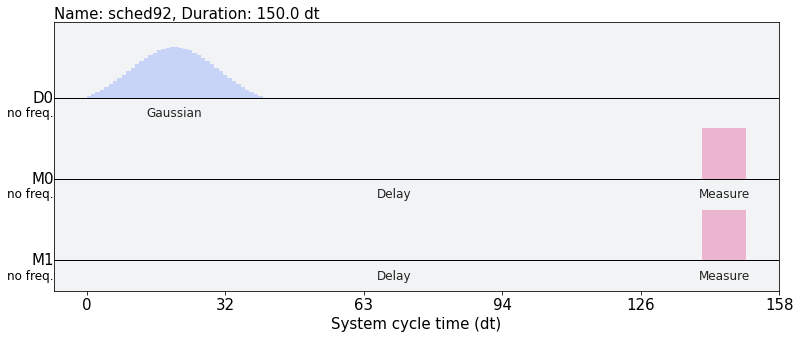

In [46]:
schedule.draw()

In [47]:
qobj = assemble(schedule,
                backend=backend_sim)
result = backend_sim.run(qobj, 
                         system_model=backend_model).result()

C:\Users\rdras\anaconda3\envs\plvqe_venv\lib\site-packages\qiskit\providers\aer\pulse\controllers\pulse_controller.py:142: UserWarning: Warning: qubit_lo_freq was not specified in PulseQobj and there is no default, so it is beign automatically determined from the drift Hamiltonian.
  warn('Warning: qubit_lo_freq was not specified in PulseQobj and there is no default, '


In [48]:
sv = result.get_statevector()
sv = Statevector(sv, dims=(3, 3))
sv.sample_counts(1024)

{'00': 4, '01': 1014, '10': 6}